In [1]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('zomato.csv')

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.shape

(51717, 17)

In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
len(data.columns)

17

In [9]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [12]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.drop_duplicates(inplace=True)

location                          21
cuisines                          45
rest_type                        227
approx_cost(for two people)      346
phone                           1208
rate                            7775
dish_liked                     28078
dtype: int64


<AxesSubplot:>

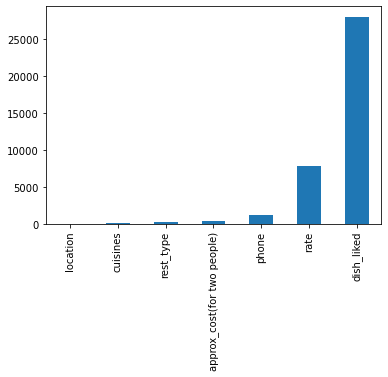

In [15]:
nan_values = data.isnull().sum()
nan_values = nan_values[nan_values > 0]
nan_values.sort_values(inplace=True)
print (nan_values)
nan_values.plot.bar()

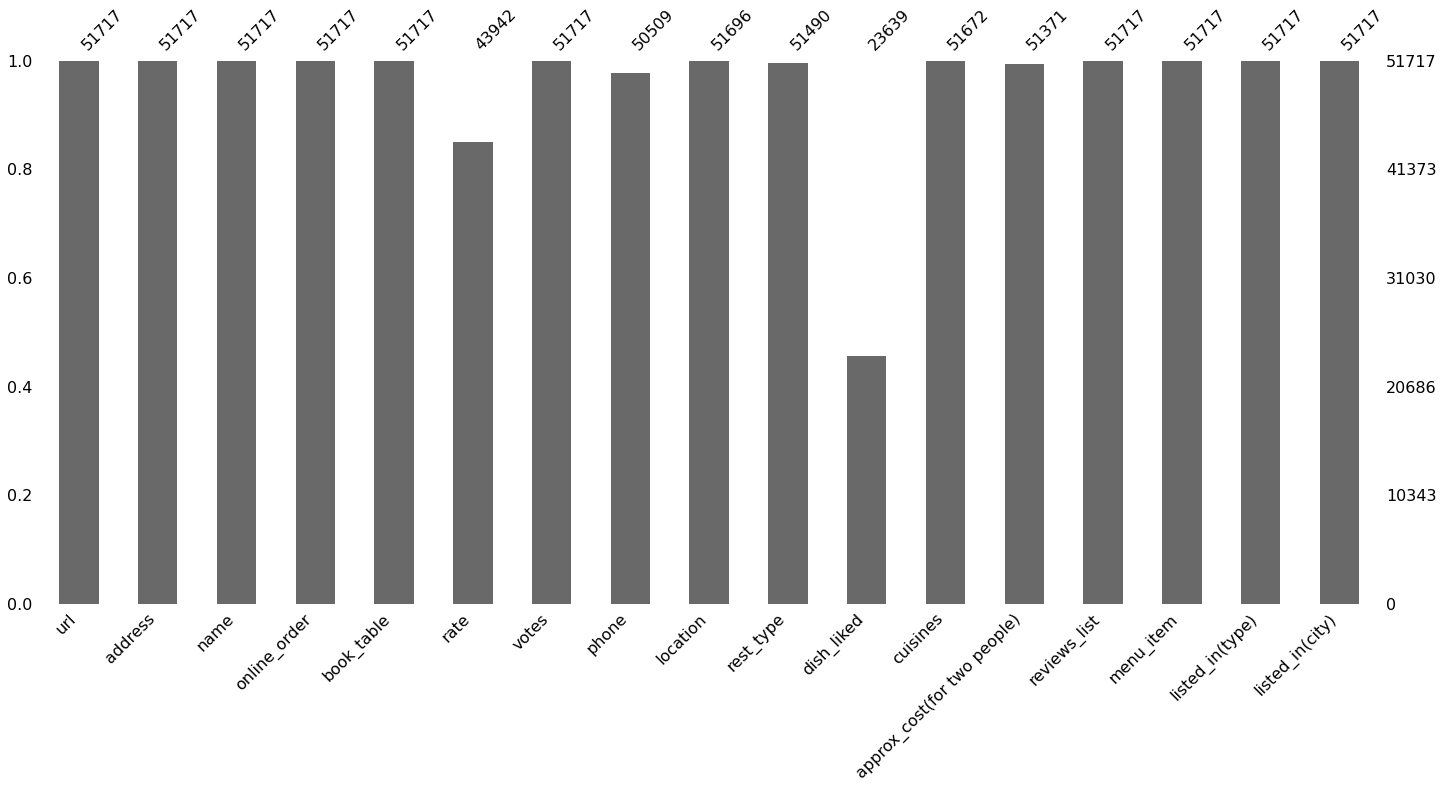

In [16]:
import missingno as msno
msno.bar(data)
plt.show()

In [17]:
categorical_columns = data.select_dtypes(exclude='int64').columns
print(categorical_columns)
numerical_columns = data.select_dtypes(include='int').columns
print(numerical_columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
Index([], dtype='object')


In [18]:
categorical_columns_count = len(categorical_columns)
numerical_columns_count = len(numerical_columns)
print('Number of Categorical values count:',categorical_columns_count)
print('Number of Numerical values count:',numerical_columns_count)

Number of Categorical values count: 16
Number of Numerical values count: 0


In [19]:
data.drop(['url','address','phone','menu_item','reviews_list','dish_liked'],axis=1,inplace=True)
print(data.shape)

(51717, 11)


In [20]:
#Renaming certain column Names in a dataset:
data = data.rename(columns = {"approx_cost(for two people)" : "avg_costs", "listed_in(type)" : "meal_type","listed_in(city)" : "city"})

In [21]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

name : 8792 labels
online_order : 2 labels
book_table : 2 labels
rate : 65 labels
votes : 2328 labels
location : 94 labels
rest_type : 94 labels
cuisines : 2724 labels
avg_costs : 71 labels
meal_type : 7 labels
city : 30 labels


In [22]:
data['online_order'].nunique()

2

In [23]:
data['book_table'].nunique()

2

Text(0.5, 1.0, 'Restaurents Delivering Online or Not')

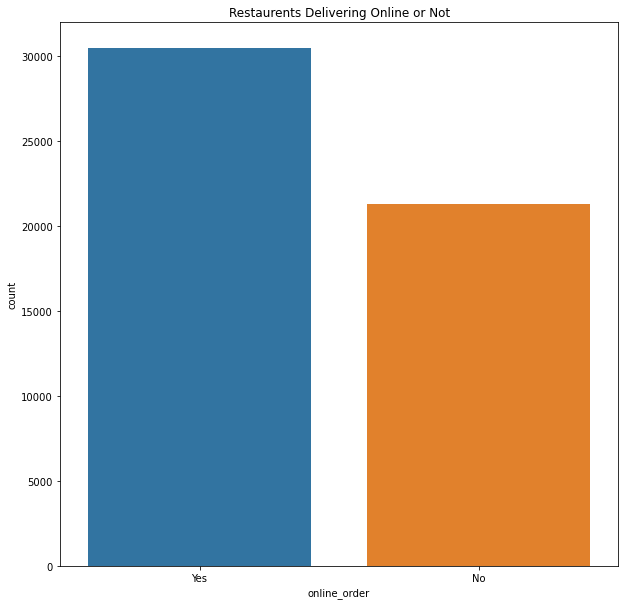

In [24]:
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurents Delivering Online or Not')

Text(0.5, 1.0, 'Restaurents booking_table or Not')

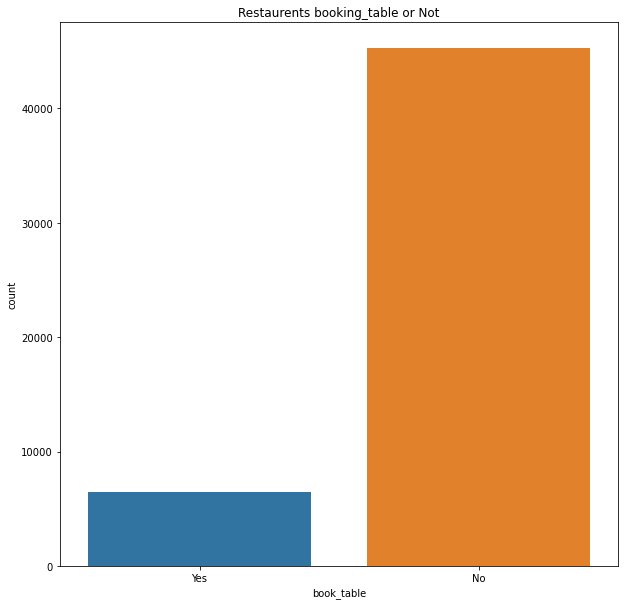

In [25]:
sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurents booking_table or Not')

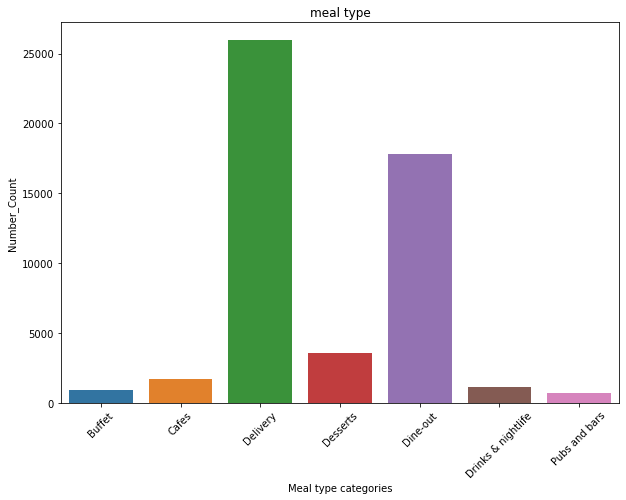

In [26]:
# Using Seaborn
plt.figure(figsize=(10,7))
sns.countplot(data['meal_type'])
plt.title("meal type")
plt.xlabel('Meal type categories')
plt.ylabel('Number_Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [28]:
data.groupby('name')['votes'].mean().sort_values(ascending = False).head(20)

name
Byg Brewski Brewing Company               16588.500000
Toit                                      14956.000000
The Black Pearl                            9562.333333
Big Pitcher                                9164.500000
Arbor Brewing Company                      8396.545455
Prost Brew Pub                             7860.900000
Church Street Social                       7561.727273
Hoot                                       7257.000000
The Hole in the Wall Cafe                  7124.875000
Truffles                                   7001.372093
Vapour Pub & Brewery                       6952.500000
TBC Sky Lounge                             6745.000000
Fenny's Lounge And Kitchen                 6370.214286
Windmills Craftworks                       5928.800000
Brew and Barbeque - A Microbrewery Pub     5868.200000
Hard Rock Cafe                             5276.583333
Flechazo                                   4992.666667
The Boozy Griffin                          4955.466667
High 

In [29]:
data.shape

(51717, 11)

In [30]:
data['rate'].nunique()

64

In [31]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
data['rate'] = data['rate'].str.replace('/','')
data['rate'] = data['rate'].str.replace('NEW','0')
data['rate'] = data['rate'].str.replace('-','0')
data['rate'] = data['rate'].fillna(0)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type,city
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.15,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.85,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.75,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.85,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
data['rate'].unique()

array(['4.15', '3.85', '3.75', '3.65', '4.65', '4.05', '4.25', '3.95',
       '3.15', '3.05', '3.25', '3.35', '2.85', '4.45', '4.35', '0',
       '2.95', '3.55', 0, '2.65', '3.8 5', '3.45', '4.55', '2.55', '2.75',
       '4.75', '2.45', '2.25', '2.35', '3.4 5', '3.6 5', '4.85', '3.9 5',
       '4.2 5', '4.0 5', '4.1 5', '3.7 5', '3.1 5', '2.9 5', '3.3 5',
       '2.8 5', '3.5 5', '2.7 5', '2.5 5', '3.2 5', '2.6 5', '4.5 5',
       '4.3 5', '4.4 5', '4.95', '2.15', '2.05', '1.85', '4.6 5', '4.9 5',
       '3.0 5', '4.8 5', '2.3 5', '4.7 5', '2.4 5', '2.1 5', '2.2 5',
       '2.0 5', '1.8 5'], dtype=object)

In [34]:
data['rate'] = data['rate'].str.replace(' ','0')

In [35]:
data['rate'].unique()

array(['4.15', '3.85', '3.75', '3.65', '4.65', '4.05', '4.25', '3.95',
       '3.15', '3.05', '3.25', '3.35', '2.85', '4.45', '4.35', '0',
       '2.95', '3.55', nan, '2.65', '3.805', '3.45', '4.55', '2.55',
       '2.75', '4.75', '2.45', '2.25', '2.35', '3.405', '3.605', '4.85',
       '3.905', '4.205', '4.005', '4.105', '3.705', '3.105', '2.905',
       '3.305', '2.805', '3.505', '2.705', '2.505', '3.205', '2.605',
       '4.505', '4.305', '4.405', '4.95', '2.15', '2.05', '1.85', '4.605',
       '4.905', '3.005', '4.805', '2.305', '4.705', '2.405', '2.105',
       '2.205', '2.005', '1.805'], dtype=object)

In [36]:
data['votes'].value_counts().head(10)

0     10027
4      1140
6       992
7       872
9       738
11      701
5       667
8       626
10      621
16      535
Name: votes, dtype: int64

In [37]:
data['votes'].nunique()

2328

In [38]:
data['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

<AxesSubplot:title={'center':'Top 15 Restaurants with maximum outlets'}, ylabel='votes'>

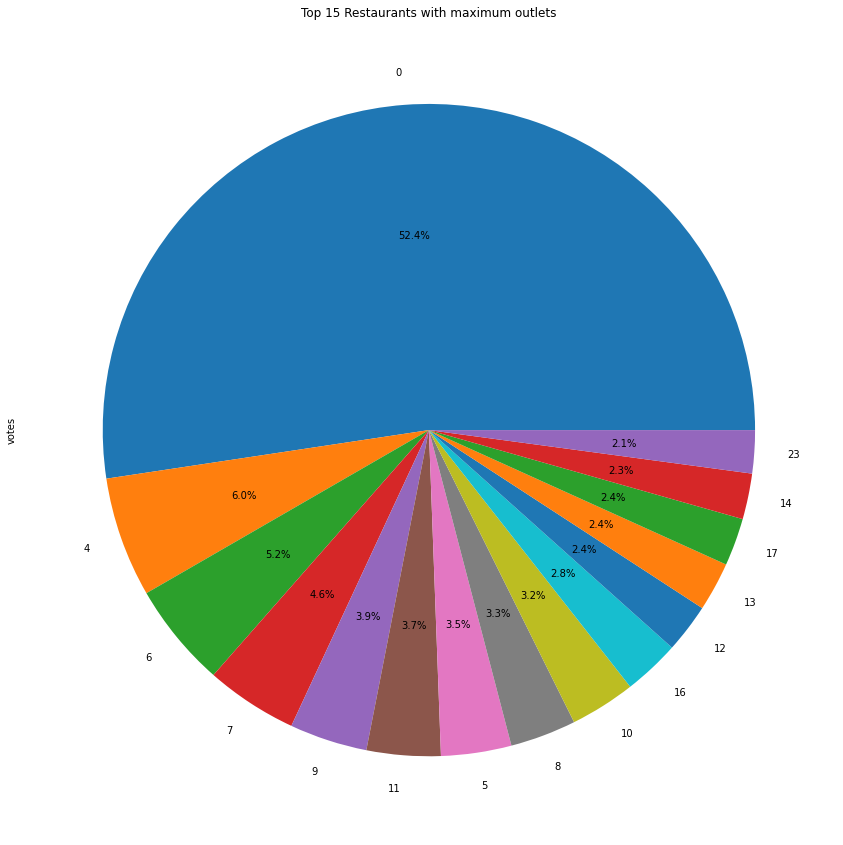

In [39]:
data['votes'].value_counts().head(15).plot(kind='pie',figsize=(15,15),title="Top 15 Restaurants with maximum outlets", autopct='%1.1f%%')

In [40]:
data['rate'].value_counts().head(10)

0        2277
3.95     2098
3.85     2022
3.75     2011
3.905    1874
3.805    1851
3.705    1810
3.65     1773
4.05     1609
4.005    1574
Name: rate, dtype: int64

In [41]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [42]:
data['location'].nunique()

93

In [43]:
data['avg_costs'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [44]:
data['avg_costs'].nunique()

70

In [45]:
data['avg_costs'] = data['avg_costs'].fillna(0)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type,city
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.15,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.85,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.75,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.85,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [46]:
data['avg_costs'].describe()

count     51717
unique       71
top         300
freq       7576
Name: avg_costs, dtype: object

In [47]:
data['avg_costs'] = data['avg_costs'].astype(str)
data['avg_costs'] = data['avg_costs'].apply(lambda x: x.replace(',','.'))
data['avg_costs'] = data['avg_costs'].astype(float)

In [48]:
data['avg_costs'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,  50.  , 190.  ,   1.7 ,
         0.  ,   1.4 , 180.  ,   1.35,   2.2 ,   2.  ,   1.8 ,   1.9 ,
       330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,   3.4 ,  40.  ,   1.25,
         3.5 ,   4.  ,   2.4 ,   2.6 , 120.  ,   1.45, 469.  ,  70.  ,
         3.2 ,  60.  , 560.  , 240.  , 360.  ,   6.  ,   1.05,   2.3 ,
         4.1 ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 , 140.  ])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          43942 non-null  object 
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   avg_costs     51717 non-null  float64
 9   meal_type     51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ MB


In [50]:
data[data['location']  == 'BTM']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type,city
879,Sankranthi Veg Restaurant,Yes,No,3.05,102,BTM,Casual Dining,"South Indian, North Indian, Chinese",600.0,Buffet,Bannerghatta Road
921,Hearts Unlock Cafe,No,No,3.25,11,BTM,Cafe,"Cafe, Healthy Food",500.0,Cafes,Bannerghatta Road
922,eat.fit,Yes,No,4.55,1178,BTM,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,Delivery,Bannerghatta Road
923,Sai Abhiruchi,Yes,No,3.75,335,BTM,Casual Dining,"Andhra, North Indian, Biryani",800.0,Delivery,Bannerghatta Road
924,Capsicum Family Restaurant,Yes,No,3.85,254,BTM,Casual Dining,"Biryani, North Indian",800.0,Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...
42425,Sweet Truth,Yes,No,4.005,29,BTM,Bakery,"Bakery, Desserts",500.0,Delivery,MG Road
42545,Sri Srinivas Park Hotel,Yes,No,NaN,0,BTM,Quick Bites,"South Indian, Fast Food",300.0,Delivery,MG Road
45106,Sri Srinivas Park Hotel,Yes,No,NaN,0,BTM,Quick Bites,"South Indian, Fast Food",300.0,Delivery,Old Airport Road
47878,The Nourished Kitchen,No,No,NaN,0,BTM,Delivery,"Asian, Continental, Healthy Food",400.0,Delivery,Residency Road


In [51]:
data['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [52]:
data.groupby(['location'],as_index=False)['avg_costs'].count()

,location,avg_costs
0,BTM,5124
1,Banashankari,906
2,Banaswadi,664
3,Bannerghatta Road,1630
4,Basavanagudi,684
...,...,...
88,West Bangalore,6
89,Whitefield,2144
90,Wilson Garden,246
91,Yelahanka,6


In [53]:
data.groupby(['meal_type'],as_index=False)['rate'].count()

,meal_type,rate
0,Buffet,873
1,Cafes,1604
2,Delivery,21863
3,Desserts,2872
4,Dine-out,14978
5,Drinks & nightlife,1083
6,Pubs and bars,669


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          43942 non-null  object 
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   avg_costs     51717 non-null  float64
 9   meal_type     51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ MB


In [55]:
data['rate'].unique()

array(['4.15', '3.85', '3.75', '3.65', '4.65', '4.05', '4.25', '3.95',
       '3.15', '3.05', '3.25', '3.35', '2.85', '4.45', '4.35', '0',
       '2.95', '3.55', nan, '2.65', '3.805', '3.45', '4.55', '2.55',
       '2.75', '4.75', '2.45', '2.25', '2.35', '3.405', '3.605', '4.85',
       '3.905', '4.205', '4.005', '4.105', '3.705', '3.105', '2.905',
       '3.305', '2.805', '3.505', '2.705', '2.505', '3.205', '2.605',
       '4.505', '4.305', '4.405', '4.95', '2.15', '2.05', '1.85', '4.605',
       '4.905', '3.005', '4.805', '2.305', '4.705', '2.405', '2.105',
       '2.205', '2.005', '1.805'], dtype=object)

In [56]:
data['rate'] = data['rate'].astype(float)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          43942 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   avg_costs     51717 non-null  float64
 9   meal_type     51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 7.2+ MB


In [58]:
data.groupby('name')['rate', 'avg_costs'].mean().sort_values(by = 'rate', ascending = False).head(15)

,rate,avg_costs
name,,
Byg Brewski Brewing Company,4.927500,1.600000
Asia Kitchen By Mainland China,4.921579,1.500000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine,4.905000,1.000000
Punjab Grill,4.882857,2.000000
Belgian Waffle Factory,4.873103,400.000000
The Pizza Bakery,4.827500,1.200000
AB's - Absolute Barbecues,4.820526,1.295652
Flechazo,4.820000,1.400000
O.G. Variar & Sons,4.805000,200.000000


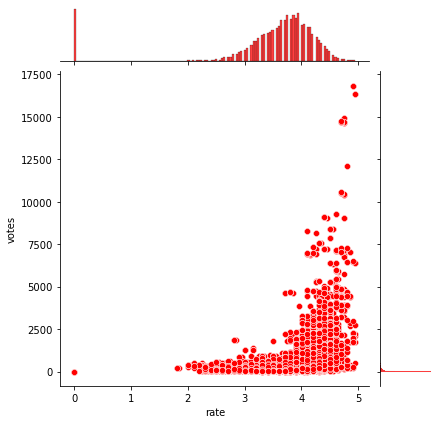

In [59]:
sns.jointplot(x='rate',y='votes',data=data,color='red')

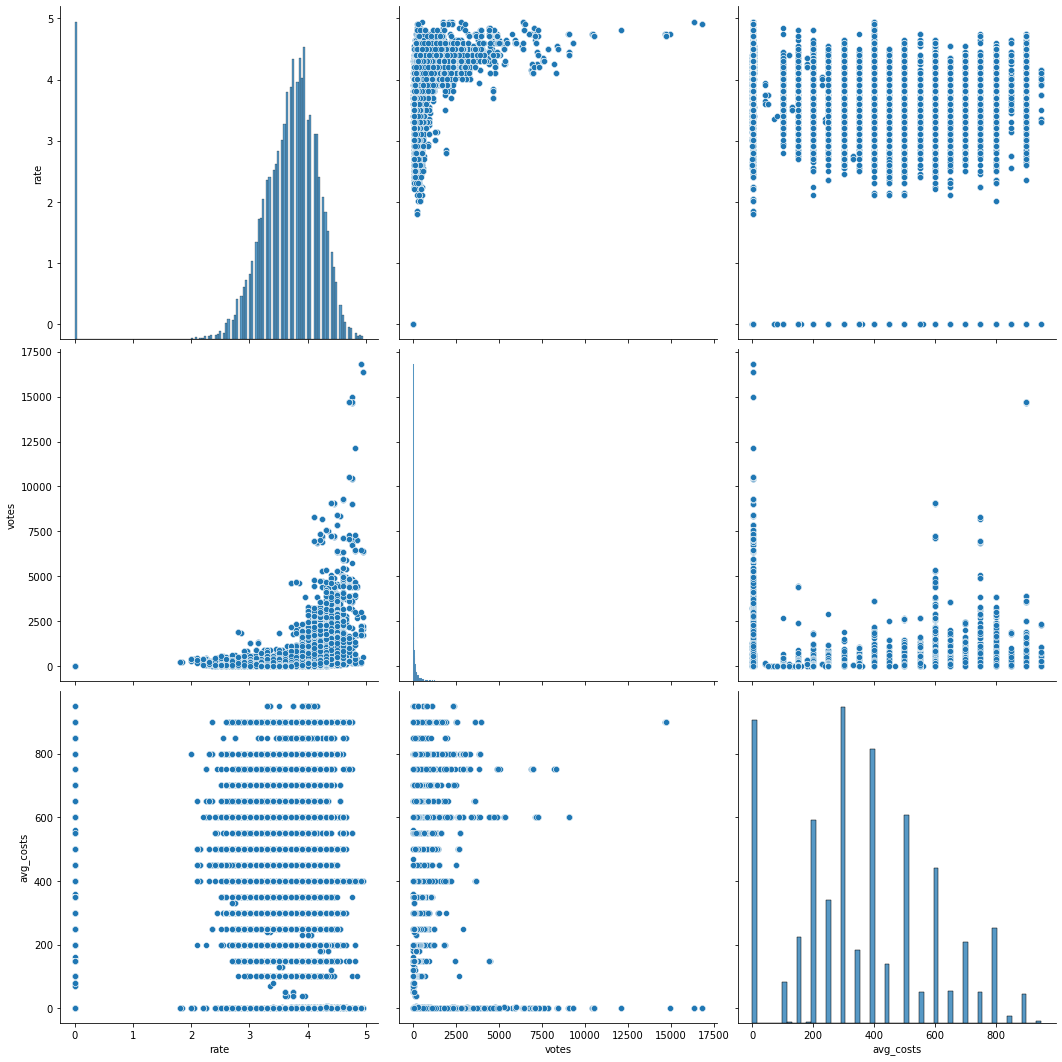

In [60]:
sns.pairplot(data,size=(5))

In [61]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type,city
0,Jalsa,Yes,Yes,4.15,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.15,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.85,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.75,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.85,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [62]:
data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [63]:
data.drop(['name','city'],axis=1,inplace=True)
print(data.shape)
data.head()

(51717, 9)


,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type
0,Yes,Yes,4.15,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.15,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.85,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.75,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.85,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51717 non-null  object 
 1   book_table    51717 non-null  object 
 2   rate          43942 non-null  float64
 3   votes         51717 non-null  int64  
 4   location      51696 non-null  object 
 5   rest_type     51490 non-null  object 
 6   cuisines      51672 non-null  object 
 7   avg_costs     51717 non-null  float64
 8   meal_type     51717 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 6.4+ MB


In [65]:
data['rate'].unique()

array([4.15 , 3.85 , 3.75 , 3.65 , 4.65 , 4.05 , 4.25 , 3.95 , 3.15 ,
       3.05 , 3.25 , 3.35 , 2.85 , 4.45 , 4.35 , 0.   , 2.95 , 3.55 ,
         nan, 2.65 , 3.805, 3.45 , 4.55 , 2.55 , 2.75 , 4.75 , 2.45 ,
       2.25 , 2.35 , 3.405, 3.605, 4.85 , 3.905, 4.205, 4.005, 4.105,
       3.705, 3.105, 2.905, 3.305, 2.805, 3.505, 2.705, 2.505, 3.205,
       2.605, 4.505, 4.305, 4.405, 4.95 , 2.15 , 2.05 , 1.85 , 4.605,
       4.905, 3.005, 4.805, 2.305, 4.705, 2.405, 2.105, 2.205, 2.005,
       1.805])

In [66]:
data['rate'] = data['rate'].fillna(0)

In [67]:
data['rate'].unique()

array([4.15 , 3.85 , 3.75 , 3.65 , 4.65 , 4.05 , 4.25 , 3.95 , 3.15 ,
       3.05 , 3.25 , 3.35 , 2.85 , 4.45 , 4.35 , 0.   , 2.95 , 3.55 ,
       2.65 , 3.805, 3.45 , 4.55 , 2.55 , 2.75 , 4.75 , 2.45 , 2.25 ,
       2.35 , 3.405, 3.605, 4.85 , 3.905, 4.205, 4.005, 4.105, 3.705,
       3.105, 2.905, 3.305, 2.805, 3.505, 2.705, 2.505, 3.205, 2.605,
       4.505, 4.305, 4.405, 4.95 , 2.15 , 2.05 , 1.85 , 4.605, 4.905,
       3.005, 4.805, 2.305, 4.705, 2.405, 2.105, 2.205, 2.005, 1.805])

In [68]:
data['rate'].dtype

dtype('float64')

In [69]:
#Encode the input Variables
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

data = Encode(data.copy())
data.head(10)

,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_costs,meal_type
0,0,0,4.15,775,0,0,0,0,0
1,0,1,4.15,787,0,0,1,0,0
2,0,1,3.85,918,0,1,2,0,0
3,1,1,3.75,88,0,2,3,1,0
4,1,1,3.85,166,1,0,4,2,0
5,0,1,3.85,286,1,0,5,2,0
6,1,1,3.65,8,2,0,6,0,0
7,0,0,4.65,2556,0,3,7,2,1
8,0,1,4.05,324,0,4,8,3,1
9,0,1,4.25,504,0,4,9,4,1


In [70]:
data.shape

(51717, 9)

In [71]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'avg_costs', 'meal_type'],
      dtype='object')

In [72]:
X = data.iloc[:,[0,1,3,4,5,6,7,8]]
y = data['rate']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 0)

In [75]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,avg_costs,meal_type
4033,0,1,5,20,2,94,17,2
48558,0,1,91,38,37,57,2,4
49245,0,1,30,19,7,831,5,2
4247,0,1,0,20,20,869,12,2
35324,0,0,584,3,0,339,15,2
...,...,...,...,...,...,...,...,...
21243,0,1,76,3,2,600,1,4
45891,1,1,33,33,0,676,24,4
42613,0,1,8,35,18,158,5,2
43567,0,0,60,45,2,359,8,4


In [76]:
y_train

4033     3.250
48558    3.605
49245    2.905
4247     0.000
35324    3.805
         ...  
21243    3.805
45891    3.305
42613    3.505
43567    3.205
2732     4.150
Name: rate, Length: 34650, dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
y_pred

array([2.29467693, 4.3387313 , 3.17327988, ..., 3.49354333, 3.11290558,
       3.44520638])

In [82]:
model.score(X_train,y_train)

0.1854316109790457

In [83]:
model.score(X_test,y_test)

0.18195834632820307

In [84]:
model.intercept_

3.548978203181034

In [85]:
model.coef_

array([-8.93262058e-01, -6.91851326e-01,  3.38540957e-04,  1.53827095e-03,
        1.94006459e-03,  1.56782369e-04,  8.33933604e-03,  3.81765625e-02])

In [86]:
coeff_df = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
online_order,-0.893262
book_table,-0.691851
votes,0.000339
location,0.001538
rest_type,0.001940
cuisines,0.000157
avg_costs,0.008339
meal_type,0.038177


In [87]:
from sklearn.linear_model import Lasso

In [88]:
model1 = Lasso()
model1.fit(X_train,y_train)

Lasso()

In [89]:
model1.score(X_train,y_train)

0.0861864694609824

In [90]:
model1.score(X_test,y_test)

0.08528627060803107

In [91]:
from sklearn.linear_model import Ridge

In [92]:
model2 = Ridge()
model2.fit(X_train,y_train)

Ridge()

In [93]:
model2.score(X_train,y_train)

0.18543160769133682

In [94]:
model2.score(X_test,y_test)

0.18195872929555512

In [95]:
import statsmodels.api as sm

In [96]:
ols = sm.OLS(endog=y_train,exog=X_train).fit()

In [97]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                          1.598e+04
Date:                Sun, 13 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:38:44   Log-Likelihood:                         -64475.
No. Observations:               34650   AIC:                                  1.290e+05
Df Residuals:                   34642   BIC:                                  1.290e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
online_order    -0.9292      0.018    -52.254      0.000      -0.964      -0.894
book_table       1.3358      0.019     70.880      0.000       1.299       1.373
votes            0.0006   1.13e-05     51.808      0.000       0.001       0.001
location         0.0103      0.000     25.420      0.000       0.009       0.011
rest_type        0.0054      0.001      7.487      0.000       0.004       0.007
cuisines         0.0004   1.34e-05     28.198      0.000       0.000       0.000
avg_costs        0.0405      0.001     38.887      0.000       0.038       0.043
meal_type        0.3452      0.007     50.917      0.000       0.332       0.359
==============================================================================
Omnibus:                     3106.995   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4033.262
Skew:                          -0.835   Prob(JB):                         0.00
Kurtosis:                       3.048   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
ols.rsquared_adj

0.7867678498515421

In [99]:
def forward_selection(data_train,response):
    remaining = set(data_train.columns)
    remaining.remove('rate')
    selected = []
    current_score,best_score = 0.0,0.0
    while remaining and current_score == best_score:
        score_with_candidates = []
        for candidate in remaining:
            X = data_train[selected + [candidate]].values
            y = data_train[response].values
            ols = sm.OLS(endog = y,exog = X).fit()
            score = ols.rsquared_adj
            score_with_candidates.append((score,candidate))
        score_with_candidates.sort()
        best_score,best_candidate = score_with_candidates.pop()
        if current_score < best_score:
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = best_score
                print(selected)
                print(current_score)

In [100]:
forward_selection(data,'rate')

['meal_type']
0.6837998078653642
['meal_type', 'location']
0.7112127754964048
['meal_type', 'location', 'votes']
0.7318092753913381
['meal_type', 'location', 'votes', 'book_table']
0.7562069931819132
['meal_type', 'location', 'votes', 'book_table', 'online_order']
0.768308182895958
['meal_type', 'location', 'votes', 'book_table', 'online_order', 'avg_costs']
0.7811810081908009
['meal_type', 'location', 'votes', 'book_table', 'online_order', 'avg_costs', 'cuisines']
0.7863710823675785
['meal_type', 'location', 'votes', 'book_table', 'online_order', 'avg_costs', 'cuisines', 'rest_type']
0.7866835912002973


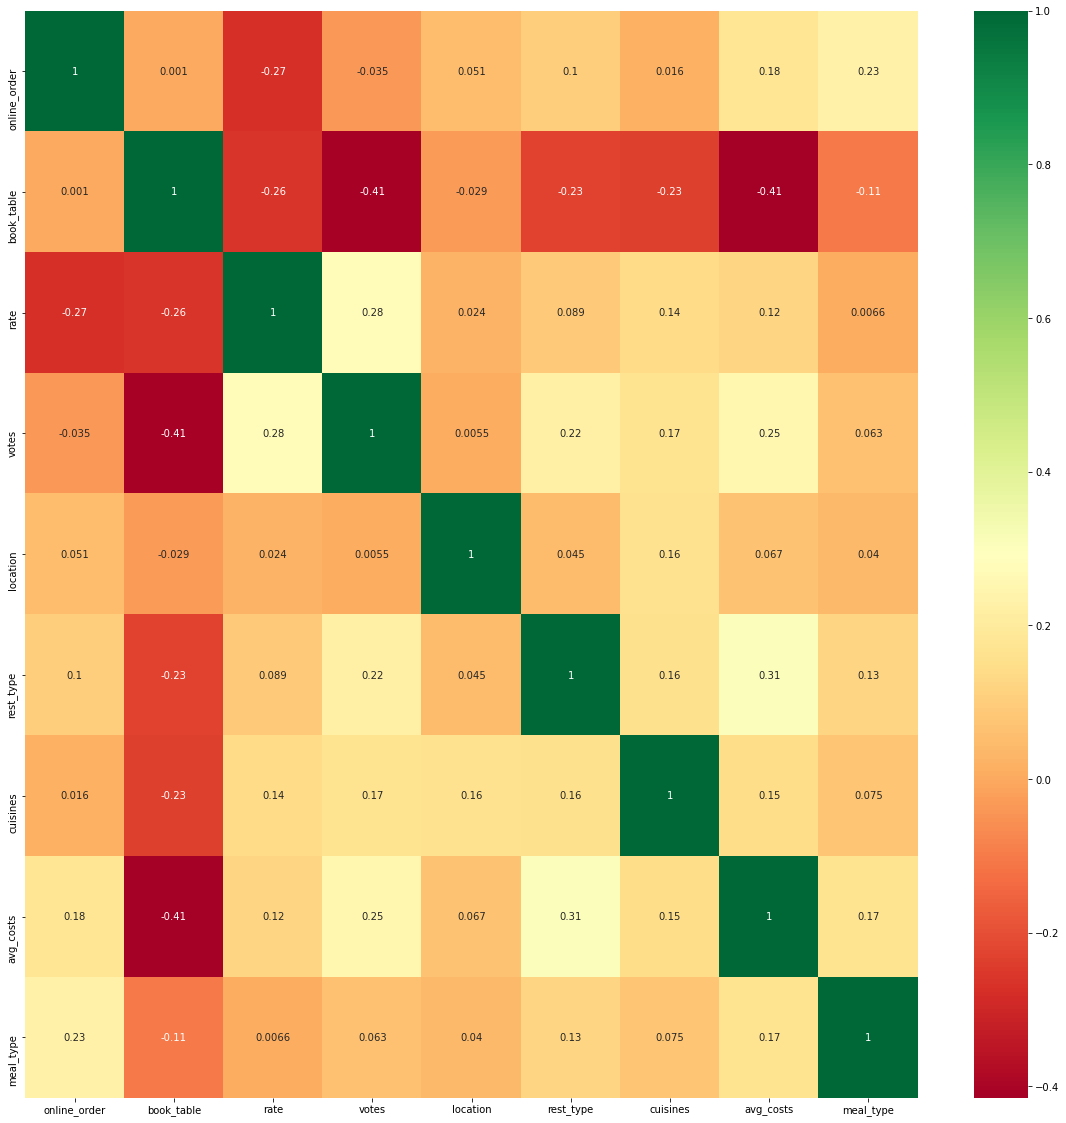

In [106]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [107]:
from sklearn import linear_model

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train,y_train)
pred = model.predict(X_test)
model.score(X_train,y_train)

0.9966061827547528